# Data Exploration

In [ ]:
%pip install datasets

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 28.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 58.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [datasets]/14 [datasets]ce-hub]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.34.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.1 which is incompatible.
tensorflow 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.2.1 which is incompatible.


In [2]:
%pip install hf_xet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [54]:
from datasets import load_dataset

dataset = load_dataset("google/civil_comments")

In [55]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'],
        num_rows: 1804874
    })
    validation: Dataset({
        features: ['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'],
        num_rows: 97320
    })
    test: Dataset({
        features: ['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'],
        num_rows: 97320
    })
})


In [56]:
print("Number of observations in training data:",len(dataset["train"]),"\n")
print("Number of observations in test data:",len(dataset["test"]),"\n")
print("Number of observations in validation data:", len(dataset["validation"]), "\n")
print("Total number of observations:", len(dataset["train"]) + len(dataset["test"]) + len(dataset["validation"]),"\n")

Number of observations in training data: 1804874 

Number of observations in test data: 97320 

Number of observations in validation data: 97320 

Total number of observations: 1999514 



From the entire dataset, we have a total of __1,999,514__ observations.
We will edit our train dataset however

In [70]:
df_train = dataset["train"].to_pandas()

In [71]:
features = df_train.columns.tolist()

In [72]:
print(features, "\n")

['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'] 



### There are a total of __8__ features in this dataset.

### text, toxicity, severe_toxicity, obscene, threat, insult, identity_attack, sexual_explicit


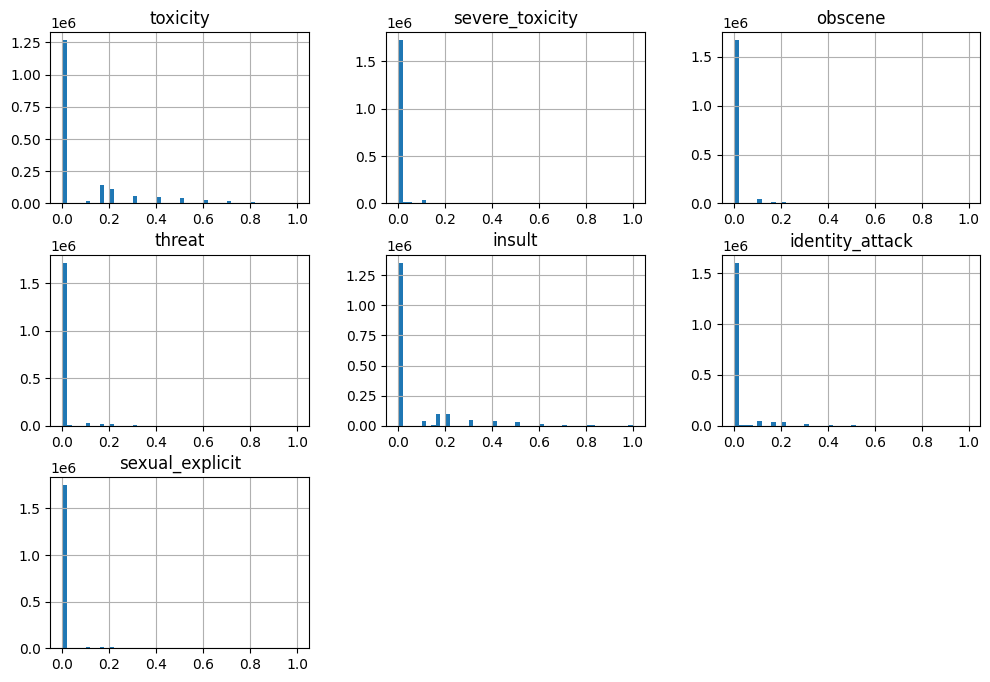

In [73]:
df_train[features].hist(bins=50, figsize=(12,8))
plt.show()

In [74]:
df_train[features].describe()

,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,1.030173e-01,4.582100e-03,1.387721e-02,9.311274e-03,8.115274e-02,2.263572e-02,6.605973e-03
std,1.970757e-01,2.286128e-02,6.460419e-02,4.942218e-02,1.760657e-01,7.873157e-02,4.529782e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [75]:
df_train.dtypes

text                object
toxicity           float32
severe_toxicity    float32
obscene            float32
threat             float32
insult             float32
identity_attack    float32
sexual_explicit    float32
dtype: object

### FEATURE DESCRIPTIONS 

There is a column labeled _text_ which is of type string. This is the statement which is ranked by the 7 features.

The rest of the features are _toxicity_, _severe_toxicity_, _obscene_, _threat_, _insult_, _identity_attack_, _sexual_explicit_

These features are all of float type. From the histogram's x values we can see that all the values are between a range from 0 to 1.

This means that in each column, the features are assigned a percentage of what people believe that text fits in. 

#### EXTRACTING NULL FEATURES

In [76]:
df_train[features].isnull().sum()

text               0
toxicity           0
severe_toxicity    0
obscene            0
threat             0
insult             0
identity_attack    0
sexual_explicit    0
dtype: int64

There are no null values 

#### EXTRACTING DUPLICATE ENTRIES

In [79]:
df_train['text'].duplicated().sum()

np.int64(24051)

Number of duplicated observations is 24051. We will drop all these duplicates to avoid future issues. 

In [80]:
df_train = df_train.drop_duplicates(subset=['text'])

In [83]:
df_train['text'].duplicated().sum()

np.int64(0)

Now the number of duplicated observations is 0

### DATA PLOTS

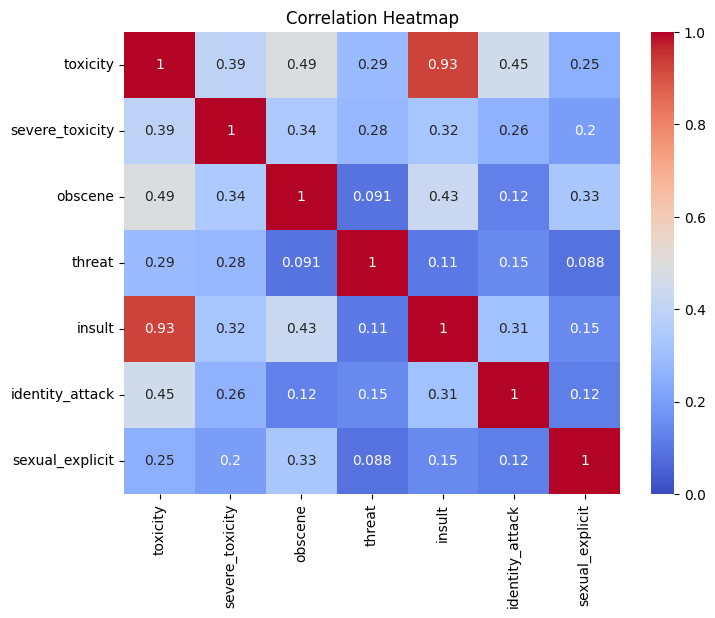

In [84]:
df_train_heatmap = df_train.copy()
df_train_heatmap = df_train_heatmap.drop(columns = ["text"])
plt.figure(figsize=(8,6))
corr = df_train_heatmap.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin = 0, vmax = 1)
plt.title("Correlation Heatmap")
plt.show()

This correlation heatmap tells us that toxicity and insult have a strong correlation. The sexual explicit has the least correlations with the features. This tells us that sexual explicit would not be a good feature to train with. 

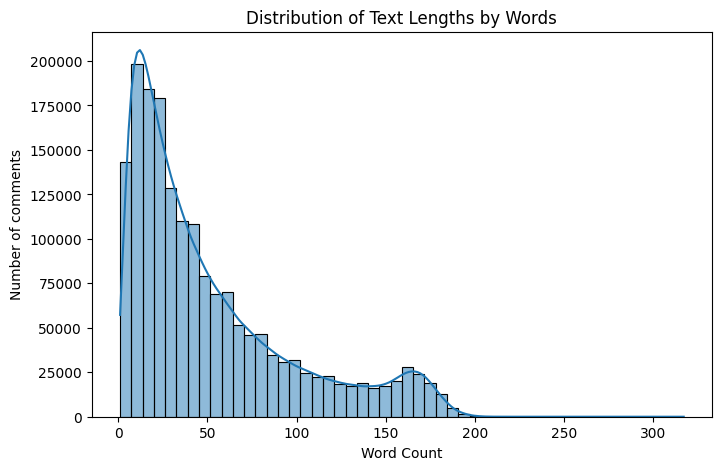

In [85]:
df_train['text_length'] = df_train['text'].str.split().str.len()
plt.figure(figsize = (8,5))
sns.histplot(df_train['text_length'], bins=50, kde = True)
plt.title("Distribution of Text Lengths by Words")
plt.xlabel("Word Count")
plt.ylabel("Number of comments")
plt.show()

In [86]:
print("Mean Word Count is : ", df_train['text_length'].mean(), "\n")
print("Standard Deviation is : ", df_train['text_length'].std())

Mean Word Count is :  51.690132595996346 

Standard Deviation is :  46.14809789800365


In [91]:
# Finding the most common word count
counts, bin_edges = np.histogram(df_train['text_length'], bins=50)

# Find the index of the maximum count
max_idx = np.argmax(counts)

# Compute the corresponding x-value (center of the bin)
x_max = (bin_edges[max_idx] + bin_edges[max_idx + 1]) / 2
print('Most common word count is:', x_max)

Most common word count is: 10.48


This histogram describes the word distribution in the dataset. From this plot, we can see that the comments range from 1 word to 317 words with the mean being ~52 and standard deviation being ~46. 
Most of the comments(~20,000) are around 10-25 words